**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:***

---
(*In Title case, separated with commas*)
***Full names of all students in the team:***

---
(*Separated by commas*)
***Id number of all students in the team:***


# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [81]:
%pip install sdv
%pip uninstall urllib3 --y
%pip install urllib3==1.26.7
exit()

Note: you may need to restart the kernel to use updated packages.
Found existing installation: urllib3 1.26.7
Uninstalling urllib3-1.26.7:
  Successfully uninstalled urllib3-1.26.7
Note: you may need to restart the kernel to use updated packages.
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sdv.lite import SingleTablePreset
from sdv.metadata import SingleTableMetadata
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import random

In [4]:
real_data=pd.read_excel("diabetes2.xlsx")

In [5]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

In [6]:
Synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

In [7]:
Synthesizer.fit(
    data=real_data
)

In [8]:
Synthetic_data = Synthesizer.sample(
    num_rows=1000
)

In [9]:
Synthetic_data.to_csv("Generated_data")


In [10]:
Synthetic_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,151,78,10,65,36.280343,0.664665,45,1
1,4,104,101,24,29,37.394831,0.078000,27,0
2,3,109,93,36,265,21.725647,0.348009,31,1
3,5,86,47,12,108,25.372657,0.763315,22,1
4,1,101,26,32,68,32.259080,0.325648,29,0
...,...,...,...,...,...,...,...,...,...
995,1,131,40,34,247,34.077538,0.745716,30,1
996,6,162,35,33,173,35.634756,0.078000,38,0
997,4,87,66,27,141,20.538039,0.581174,36,0
998,7,158,85,45,140,33.499651,0.583793,34,1


# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***


In [11]:
df = pd.read_csv("Generated_data")
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,4,151,78,10,65,36.280343,0.664665,45,1
1,1,4,104,101,24,29,37.394831,0.078000,27,0
2,2,3,109,93,36,265,21.725647,0.348009,31,1
3,3,5,86,47,12,108,25.372657,0.763315,22,1
4,4,1,101,26,32,68,32.259080,0.325648,29,0


In [12]:
df.shape

(1000, 10)

In [13]:
df.dtypes

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Pregnancies               1000 non-null   int64  
 2   Glucose                   1000 non-null   int64  
 3   BloodPressure             1000 non-null   int64  
 4   SkinThickness             1000 non-null   int64  
 5   Insulin                   1000 non-null   int64  
 6   BMI                       1000 non-null   float64
 7   DiabetesPedigreeFunction  1000 non-null   float64
 8   Age                       1000 non-null   int64  
 9   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.2 KB


In [15]:
split_ratio = 0.8

total_rows = len(df)
train_rows = int(split_ratio * total_rows)
test_rows = total_rows - train_rows

train_data = df.iloc[:train_rows, :]
test_data = df.iloc[train_rows:, :]


In [16]:
train_data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,4,151,78,10,65,36.280343,0.664665,45,1
1,1,4,104,101,24,29,37.394831,0.078000,27,0
2,2,3,109,93,36,265,21.725647,0.348009,31,1
3,3,5,86,47,12,108,25.372657,0.763315,22,1
4,4,1,101,26,32,68,32.259080,0.325648,29,0
...,...,...,...,...,...,...,...,...,...,...
795,795,10,136,37,22,102,18.827875,0.498859,36,1
796,796,5,88,86,35,94,22.532998,0.221862,28,0
797,797,1,65,27,0,57,23.559959,0.662899,21,0
798,798,4,69,65,45,109,33.675696,0.541546,28,1


In [17]:
test_data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
800,800,6,112,55,44,81,42.923818,0.281845,26,1
801,801,3,95,46,0,0,21.338712,0.184723,66,0
802,802,11,85,89,0,52,22.756673,0.078000,46,0
803,803,0,106,57,0,0,33.006869,0.078000,21,0
804,804,5,185,78,13,189,40.989069,0.690908,45,1
...,...,...,...,...,...,...,...,...,...,...
995,995,1,131,40,34,247,34.077538,0.745716,30,1
996,996,6,162,35,33,173,35.634756,0.078000,38,0
997,997,4,87,66,27,141,20.538039,0.581174,36,0
998,998,7,158,85,45,140,33.499651,0.583793,34,1


In [18]:
train_data.shape, test_data.shape

((800, 10), (200, 10))

In [19]:
X_train = train_data.drop(['Outcome'], axis=1)
y_train = train_data['Outcome']
X_test = test_data.drop(['Outcome'], axis=1)
y_test = test_data['Outcome']

In [20]:
X_train.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,4,151,78,10,65,36.280343,0.664665,45
1,1,4,104,101,24,29,37.394831,0.078000,27
2,2,3,109,93,36,265,21.725647,0.348009,31
3,3,5,86,47,12,108,25.372657,0.763315,22
4,4,1,101,26,32,68,32.259080,0.325648,29


In [21]:
y_train.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [22]:
X_test.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
800,800,6,112,55,44,81,42.923818,0.281845,26
801,801,3,95,46,0,0,21.338712,0.184723,66
802,802,11,85,89,0,52,22.756673,0.078000,46
803,803,0,106,57,0,0,33.006869,0.078000,21
804,804,5,185,78,13,189,40.989069,0.690908,45


In [23]:
y_test.head()

800    1
801    0
802    0
803    0
804    1
Name: Outcome, dtype: int64

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [24]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X.head(),y.head()

(   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
 0           0            4      151             78             10       65   
 1           1            4      104            101             24       29   
 2           2            3      109             93             36      265   
 3           3            5       86             47             12      108   
 4           4            1      101             26             32       68   
 
          BMI  DiabetesPedigreeFunction  Age  
 0  36.280343                  0.664665   45  
 1  37.394831                  0.078000   27  
 2  21.725647                  0.348009   31  
 3  25.372657                  0.763315   22  
 4  32.259080                  0.325648   29  ,
 0    1
 1    0
 2    1
 3    1
 4    0
 Name: Outcome, dtype: int64)

In [31]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape(),y_train.shape(),X_test.shape(),y_test.shape()

TypeError: 'tuple' object is not callable

In [28]:
class SGD_Regressor:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        self.intercept = 0
        self.coef_ = np.ones(X.shape[1])

        for i in range(self.epochs):
            for j in range(X.shape[0]):
                idx = random.randint(0, X.shape[0])
                y_hat = np.dot(X[idx], self.coef_) + self.intercept_
                intercept_grad = -2 * (y[idx] - y_hat)    
                self.intercept_ = self.intercept_ - (self.learning_rate * intercept_grad)
                coef_grad = -2*np.mean((y[idx] - y_hat)*X[idx])
                self.coef_ = self.coef_ - (self.learning_rate * coef_grad)
            print("Epoch: ", i, "Intercept: ", self.intercept_, "Coef: ", self.coef_)

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

In [33]:
sgd=SGD_Regressor(learning_rate=0.1, epochs=10)
sgd.fit(X_train, y_train)

KeyError: 788

In [55]:
def cost_function(X,y, theta):
    m = len(y)
    y_hat = X.dot(theta)
    J = (1/m)*np.sum(np.square(y_hat-y))
    return J


In [56]:
def gradient(X,y,theta):
    m = len(y)
    y_hat = X.dot(theta)
    grad = (1/m)*X.T.dot(y_hat-y)
    return grad

In [57]:
def Stochastic_Gradient_Descent(X, y, learning_rate, epochs):
    """
    This function implements the Stochastic Gradient Descent algorithm.
    """
    theta = np.zeros((X.shape[1], 1))
    J_history = np.zeros((epochs, 8000))
    m = len(y)
    for i in range(epochs):
            rand_ind = random.randint(0,m)
            X_i = X.iloc[rand_ind, :].values.reshape(1, -1)
            y_i = y.iloc[rand_ind].reshape(1, -1)
            # y_hat = X_i.dot(theta)
            # theta = theta - learning_rate*(1/m)*(X_i.T.dot((y_hat - y_i)))
            # cost += cost_function(X_i,y_i)
            grad = gradient(X_i,y_i,theta)
            theta = theta - learning_rate*grad
            J_history[i] = cost_function(X,y,theta)
        
    return theta, J_history


In [58]:
theta,J_history = Stochastic_Gradient_Descent(X_train, y_train, learning_rate=0.01, epochs=100)

/home/codespace/.python/current/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/codespace/.python/current/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/codespace/.python/current/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pa

In [59]:
theta, J_history

(array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]),
 array([[9.87556684e+10, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.66654154e+20, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.33980001e+31, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]))

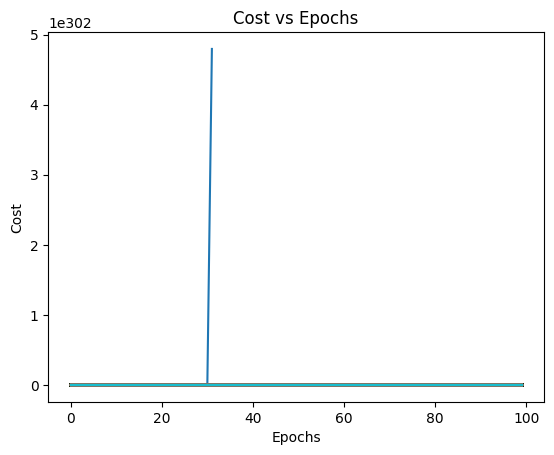

In [60]:
import matplotlib.pyplot as plt
plt.plot(J_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()

In [61]:
print("Optimized weights are: ", theta)
print("Minimum cost is: ", J_history[-1])

Optimized weights are:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Minimum cost is:  [0. 0. 0. ... 0. 0. 0.]


In [41]:
y_i = y.iloc[13].reshape(1, -1)
y_i

array([[1]])

In [74]:
theta

Unnamed: 0                 NaN
Pregnancies                NaN
Glucose                    NaN
BloodPressure              NaN
SkinThickness              NaN
Insulin                    NaN
BMI                        NaN
DiabetesPedigreeFunction   NaN
Age                        NaN
dtype: float64

## **_Batch Gradient Descent_**

0.7031521739130435


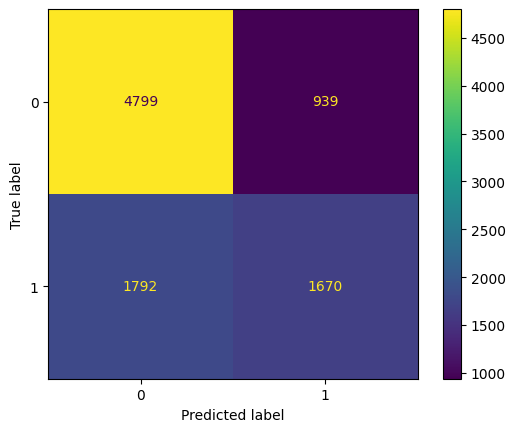

In [34]:
def gradient_descent(x,y, alpha, iterations):

    costIteration = []  # For storing the cost function at each iteration
    theta = np.zeros((1,x.shape[1]))# Initializing thetas with 0s

    m = y.size

    for i in range(iterations):
        h = x.dot(theta.T)
        theta = theta - alpha*(1/m)*(np.dot(x.T, h-y.values))[:,0]
    return theta


j=0.1
k=120
theta=gradient_descent(X, Y, alpha=j, iterations=k)[0]

prediction_t=[]
for i in x_t.index:
    prediction=round(np.clip(x_t.loc[i,:].dot(theta),0,1))
    prediction_t.append(prediction)

ConfusionMatrixDisplay(confusion_matrix(y_t,prediction_t)).plot()
print(accuracy_score(y_t,prediction_t))